## Importação, leitura e limpeza

In [ ]:
from itertools import groupby

import pandas as pd

In [ ]:
# Leitura do dataset a ser utilizado
df = pd.read_csv('../data/Pokemon.csv')

In [ ]:
# Preenchimento dos valores NaN do dataframe (Type 2)
df['Type 2'] = df['Type 2'].fillna('None')

In [ ]:
# Renomeando a coluna '#' para adaptabilidade e manutenção do dataframe
df.rename(columns={'#': 'Pokedex_ID'}, inplace = True)

## Análise 1: Lendários Vs. Comuns
Agora que os dados estão limpos, iremos iniciar com uma análise entre os Pokémons lendários e comuns.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.groupby('Legendary')[['Total','HP','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()

In [ ]:
sns.countplot(x='Legendary', data=df)
plt.title('Contagem de Pokémons Lendários vs. Não Lendários')

plt.ylabel('Quantidade')
plt.xlabel('É Lendário?')

plt.show()

Dentro dos 721 Pokémons presentes no dataset - contabilizando com as variações, temos um total de 800 Pokémons -, temos uma minoria de 65 espécimes consideradas lendárias.

In [ ]:
sns.barplot(x='Legendary', y='Total', data=df)

plt.title('Média dos status "Total" entre Pokémons Lendários e Não Lendários')

plt.ylabel('Média do status Total')
plt.xlabel('É Lendário?')

plt.show()

Aqui, podemos verificar que ainda que tenhamos uma minoria de Pokémons Lendários, apenas 65, a média do atributo "Total", o qual indica o quão forte é um pokémon, é predominantemente maior nos pokemóns lendários.

In [ ]:
sns.boxplot(x='Legendary', y='Attack', data=df)

plt.title('Distribuição do Status "Attack": Lendários vs. Não Lendários')

plt.show()

Com as visualizações levantadas até o momento, uma possível conclusão é a de que os pokémons lendários são muito superiores aos pokémons comuns. Isso pode nos levar a crer, de forma equívocada, que um pokémons lendário sempre ganhará uma disputa de um não lendário. Contudo, como podemos verificar neste último gráfico, há pokémons comuns com dano de ataque equivalente ou mesmo superior a de pokémons lendários. É certo que em uma disputa, não importa apenas o stats de ataque, há outras variáveis como defesa, ataque especial, etc. Porém, já podemos levantar uma hipótese de que ser lendário, não implica, necessariamente, em uma vitória.

## Análise 2: Qual tipo de pokémon é mais forte?

In [14]:
media_ataque = df.groupby('Type 1')['Attack'].mean()

print(media_ataque)

Type 1
Bug          70.971014
Dark         88.387097
Dragon      112.125000
Electric     69.090909
Fairy        61.529412
Fighting     96.777778
Fire         84.769231
Flying       78.750000
Ghost        73.781250
Grass        73.214286
Ground       95.750000
Ice          72.750000
Normal       73.469388
Poison       74.678571
Psychic      71.456140
Rock         92.863636
Steel        92.703704
Water        74.151786
Name: Attack, dtype: float64


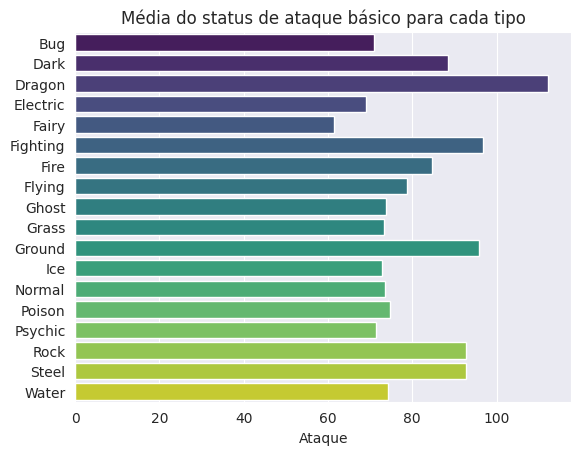

In [23]:
sns.barplot(x=media_ataque.values, y=media_ataque.index, hue=media_ataque.index, legend=False, palette='viridis')

plt.title('Média do status de ataque básico para cada tipo')

plt.xlabel('Ataque')
plt.ylabel('')

plt.show()

Com esta análise, podemos verificar que o tipo Dragon é disparado o pokémon com maior dano de Attack. Não é necessariamente o mais forte. Além disso, o tipo Fairy destaca-se como o tipo com menor dano de Attack, da mesma forma, isso não implica que este tipo seja o mais fraco. O ideal é fazer uma análise de status correlacionada para determinarmos qual o tipo mais forte.